In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
insurance = pd.read_csv("insurance.csv")
df = insurance.copy()
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df['bmi'] = df['bmi'].astype('category')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   object  
 2   bmi       1338 non-null   category
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   object  
 5   region    1338 non-null   object  
 6   charges   1338 non-null   float64 
dtypes: category(1), float64(1), int64(2), object(3)
memory usage: 85.9+ KB


In [ ]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df['bmi'].value_counts()

32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64

<Axes: ylabel='bmi'>

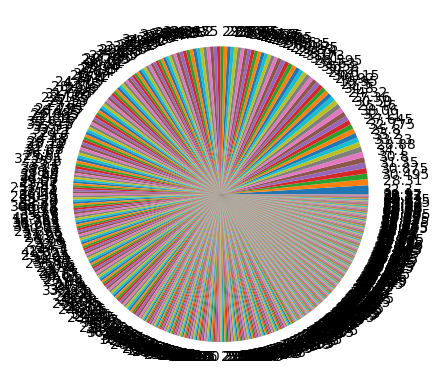

In [6]:
df['bmi'].value_counts().plot.pie()

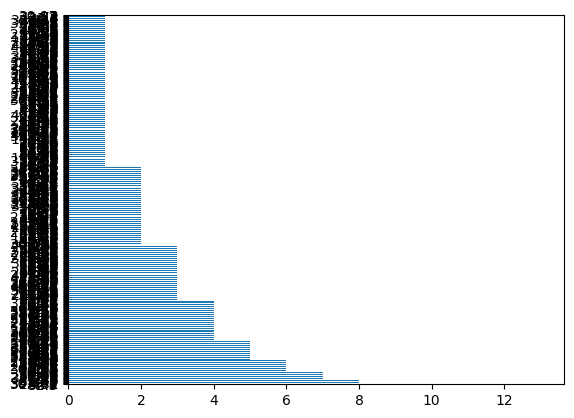

In [7]:
df['bmi'].value_counts().plot.barh();

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import *

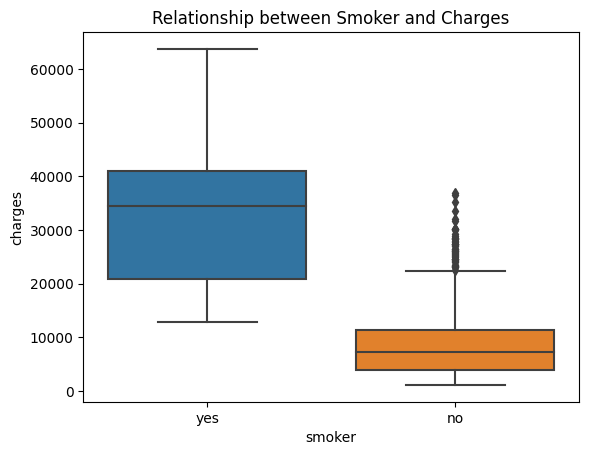

In [10]:
sns.boxplot(data=df, x="smoker", y="charges")
plt.title("Relationship between Smoker and Charges")
plt.show()

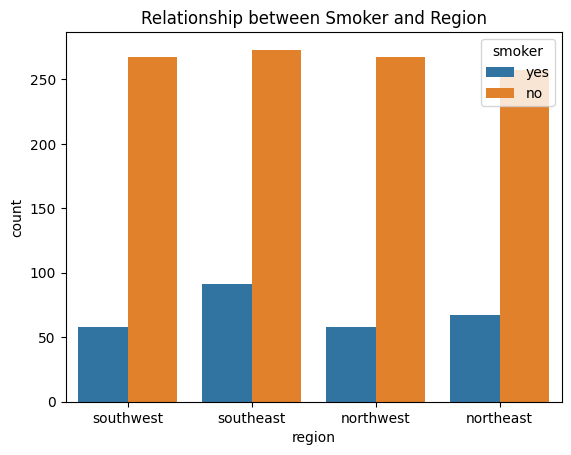

In [11]:
sns.countplot(data=df, x="region", hue="smoker")
plt.title("Relationship between Smoker and Region")
plt.show()

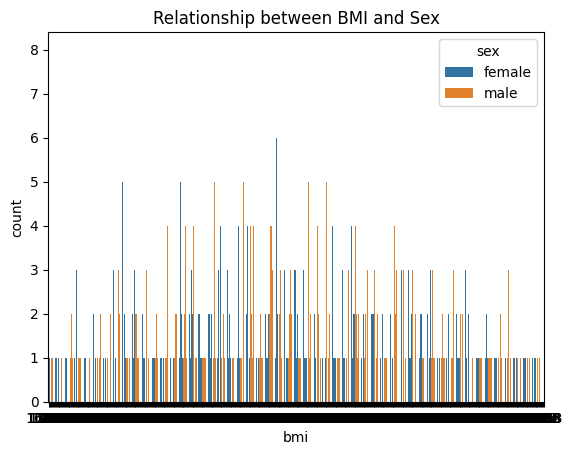

In [18]:
sns.countplot(data=df, x="bmi", hue="sex")
plt.title("Relationship between BMI and Sex")
plt.show()
#box plot sayısal veriler için, kategorik veriler için çubuk bar grafik kullanılmalı

In [13]:
region_with_most_children = df["region"].value_counts().idxmax()
print("Region with the most children:", region_with_most_children)


Region with the most children: southeast


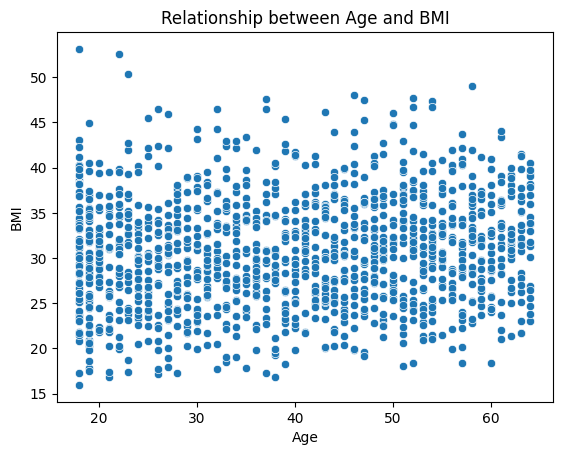

In [14]:
sns.scatterplot(data=df, x="age", y="bmi")
plt.title("Relationship between Age and BMI")
plt.xlabel("Age")
plt.ylabel("BMI")
plt.show()

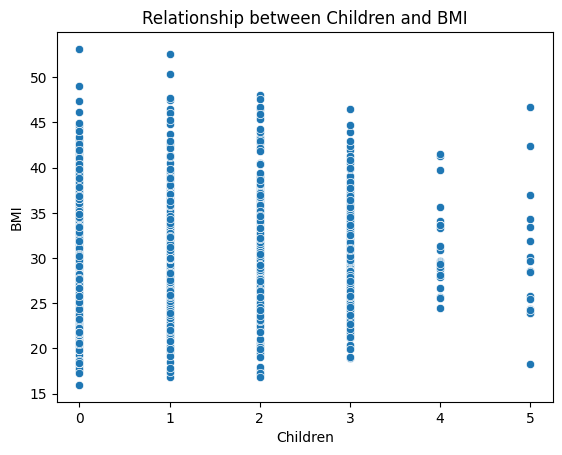

In [16]:
sns.scatterplot(data=df, x="children", y="bmi")
plt.title("Relationship between Children and BMI")
plt.xlabel("Children")
plt.ylabel("BMI")
plt.show()

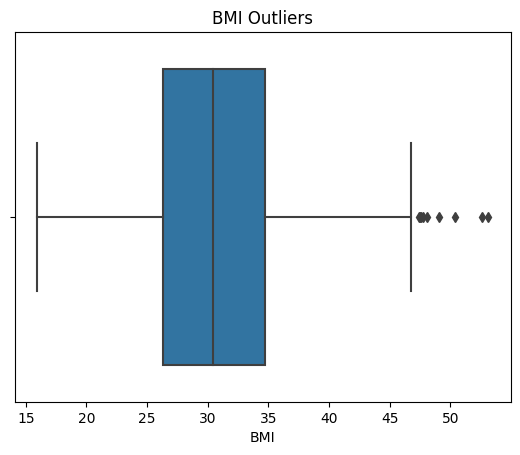

In [20]:
sns.boxplot(data=df, x="bmi")
plt.title("BMI Outliers")
plt.xlabel("BMI")
plt.show()

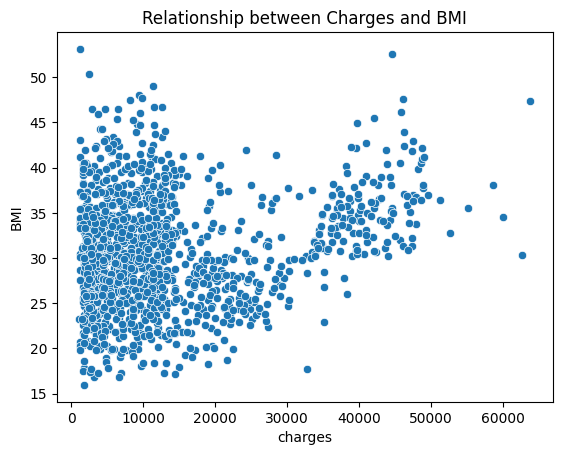

In [19]:
sns.scatterplot(data=df, x="charges", y="bmi")
plt.title("Relationship between Charges and BMI")
plt.xlabel("charges")
plt.ylabel("BMI")
plt.show()

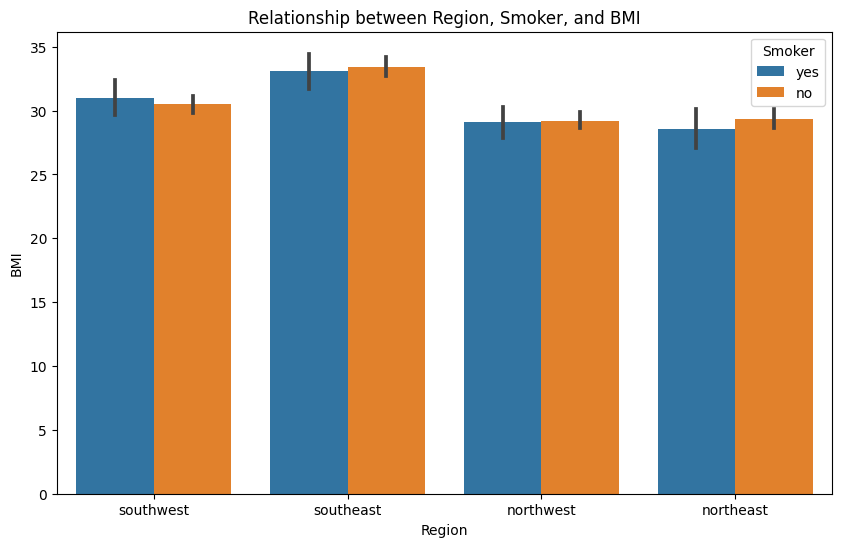

In [22]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="region", y="bmi", hue="smoker")
plt.title("Relationship between Region, Smoker, and BMI")
plt.xlabel("Region")
plt.ylabel("BMI")
plt.legend(title="Smoker")
plt.show()

----

In [33]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [45]:
# Label Encoding
label_columns = ['sex']
label_encoder = LabelEncoder()
for col in label_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Pandas kütüphanesini kullanarak One-Hot Encoding uygulama
X_encoded = pd.get_dummies(df, columns=['smoker', 'region'], drop_first=False)
X_encoded

,age,sex,bmi,children,charges,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,16884.92400,0,1,0,0,0,1
1,18,1,33.770,1,1725.55230,1,0,0,0,1,0
2,28,1,33.000,3,4449.46200,1,0,0,0,1,0
3,33,1,22.705,0,21984.47061,1,0,0,1,0,0
4,32,1,28.880,0,3866.85520,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,10600.54830,1,0,0,1,0,0
1334,18,0,31.920,0,2205.98080,1,0,1,0,0,0
1335,18,0,36.850,0,1629.83350,1,0,0,0,1,0
1336,21,0,25.800,0,2007.94500,1,0,0,0,0,1


In [48]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Ölçekleme seçimi
columns_to_scale = ['bmi', 'charges']

# Ölçekleme
df_last =X_encoded.copy()
df_last[columns_to_scale] = scaler.fit_transform(df_last[columns_to_scale])
df_last

,age,sex,bmi,children,charges,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,0.321227,0,0.251611,0,1,0,0,0,1
1,18,1,0.479150,1,0.009636,1,0,0,0,1,0
2,28,1,0.458434,3,0.053115,1,0,0,0,1,0
3,33,1,0.181464,0,0.333010,1,0,0,1,0,0
4,32,1,0.347592,0,0.043816,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,1,0.403820,3,0.151299,1,0,0,1,0,0
1334,18,0,0.429379,0,0.017305,1,0,1,0,0,0
1335,18,0,0.562012,0,0.008108,1,0,0,0,1,0
1336,21,0,0.264730,0,0.014144,1,0,0,0,0,1


In [44]:
from sklearn.model_selection import train_test_split
y = df_last['bmi']
X = df_last.drop(['bmi'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47)


In [50]:
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
df_last

,age,sex,bmi,children,charges,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,0.321227,0,0.251611,0,1,0,0,0,1
1,18,1,0.479150,1,0.009636,1,0,0,0,1,0
2,28,1,0.458434,3,0.053115,1,0,0,0,1,0
3,33,1,0.181464,0,0.333010,1,0,0,1,0,0
4,32,1,0.347592,0,0.043816,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,1,0.403820,3,0.151299,1,0,0,1,0,0
1334,18,0,0.429379,0,0.017305,1,0,1,0,0,0
1335,18,0,0.562012,0,0.008108,1,0,0,0,1,0
1336,21,0,0.264730,0,0.014144,1,0,0,0,0,1


------


# **Model Selection**

In [51]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [52]:
y = df_last['bmi']
X = df_last.drop(['bmi'],axis=1)

In [53]:
models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree', DecisionTreeRegressor()),
    ('Support Vector Machine', SVR())
]

for name, model in models:
    scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)
    print(f"{name} RMSE Scores: {rmse_scores}")
    print(f"{name} Mean RMSE: {np.mean(rmse_scores)}\n")

Linear Regression RMSE Scores: [0.14339149 0.14726322 0.15531191 0.15039982 0.15056077]
Linear Regression Mean RMSE: 0.149385441403257

Decision Tree RMSE Scores: [0.17858735 0.18943513 0.20836235 0.20779692 0.18928491]
Decision Tree Mean RMSE: 0.19469333244374581

Support Vector Machine RMSE Scores: [0.1501109  0.15141583 0.16757667 0.16063432 0.1587021 ]
Support Vector Machine Mean RMSE: 0.1576879618629563



### **Linear Regression modeli kullanılacaktır.**

# **Hyper-parameter Optimization**

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

In [55]:
model = LinearRegression()

In [57]:
# Grid Search için hiper-parametre kombinasyonlarını belirleme
param_grid = {
    'copy_X': [True, False],
    'fit_intercept': [True, False],
    'n_jobs': [1, -1],
    'positive': [True, False]
}

In [75]:
grid_search = GridSearchCV(model, param_grid, cv=6, scoring='neg_mean_squared_error')
#Bu durumda cv=6 olarak belirtildiğinde, veri kümesi 6 parçaya ayrılacaktır.
#Her bir parça sırayla test verisi olarak kullanılırken diğer 5 parça eğitim verisi olarak kullanılacaktır.

In [76]:
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=6, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False], 'n_jobs': [1, -1],
                         'positive': [True, False]},
             scoring='neg_mean_squared_error')

In [77]:
print("Best Parameters:", grid_search.best_params_) # En iyi hiper-parametre kombinasyonunu elde etme
print("Best RMSE:", np.sqrt(-grid_search.best_score_))

Best Parameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'positive': True}
Best RMSE: 0.15153458574797296


# **Model Evaluation**

In [78]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


y_pred = grid_search.predict(X_test_scaled)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# R^2 Score (Coefficient of Determination)
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)

Mean Squared Error: 0.020674302486427293
Root Mean Squared Error: 0.14378561293268285
Mean Absolute Error: 0.11416430147454866
R^2 Score: 0.20759055990526987
